# Aim

The aim of this notebook is to build on my implementation of a decision boundry in 2D space and build a decision boundry in 3D space.

**"Why?", you may ask.**

Well, to be honest it's mainly because I think it'll look cool. Another reason, however, is because I'm interested in seeing how the decision boundry changes as higher dimensional input matrices are used. I feel that developing a 3D plot to visiualise this should help me improve my intuition in regards to this

It will also be interesting to see the effect on the plot of using different learning models and architectures.

## Approach

After doing a bit of research as to how to go about creating this plot I have determined the following:

- The drawing of 3D plots is enabled via matplotlib's mpl_toolkits.mplot3D
- Using voxels seems to be the best approach as this allows for a minimal number of objects to be plotted which in turm helps keep the graph responsive

References:
- [mplot3d](https://matplotlib.org/tutorials/toolkits/mplot3d.html)
- [Voxels - Wikipedia](https://en.wikipedia.org/wiki/Voxel)
- [3D voxel - Matplotlib](https://matplotlib.org/gallery/mplot3d/voxels_rgb.html)

So without further ado, let's get to the code!

## Packages

In [47]:
# Plotting libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Matplotlib magic to enable manipulation of the plot in the notebook
%matplotlib notebook

# Numpy to enable the use of ndarrays
import numpy as np

# Sklearn so that I don't have a build a full model from scratch
from sklearn.neural_network import MLPClassifier

## Plotting function

In [52]:
def plot_prediction_space_3d(X, Y, model, show_edges=False):
    """
    Plots the 3d prediction space for an input with 3 parameters using the specified model
    
    Parameters:
    
    X = Array of shape(m, 3) where:
        m = number of examples
        3 = x, y and z points representing the 3 features
        
    Y = 1D input that contans labels
    
    model - the sklearn model used to call the predict method
    
    show_edges - If True, shows voxel edges in plot  
    """

    # Function to determine midpoints of voxels
    def midpoints(x):
        sl = ()
        for i in range(x.ndim):
            x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
            sl += np.index_exp[:]
        return x

    # Extract features
    x = X[:,0]
    y = X[:,1]
    z = X[:,2]
    
    # Determine values for scaling
    x_max, y_max, z_max = np.max(x), np.max(y), np.max(z)
    x_min, y_min, z_min = np.min(x), np.min(y), np.min(z)
    
    t_max = max([x_max, y_max, z_max])
    t_min = min([x_min, y_min, z_min])
    
    scale = np.ceil((t_max - t_min)).astype(int) # To make sure plot is cubic    
    
    # Set up the plot space
    r, g, b = np.indices((scale, scale, scale))
    
    # Determine midpoints 
    rc = midpoints(r)
    gc = midpoints(g)
    bc = midpoints(b)

    # Determine shaded prediction space
    prediction_space = rc.copy()
    
    for ri, row in enumerate(prediction_space):
        for ci, col in enumerate(row):
            for di, dim in enumerate(col):
                prediction_space[ri][ci][di] = model.predict([[row[0][0], col[0], dim]])
   
    # Determine if edges should be plotted
    if show_edges:
        ec="k"
    else:
        ec=None

    # Set up plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    
    # Plot voxels
    ax.voxels(r, g, b, 
              prediction_space,             # Shows which volxls should be activated
              linewidth=0.5, edgecolors=ec, # Parameters for edges
              facecolors='#10f0004D')       # Voxel colour. Note last 2 characters determine alpha (opacity)
    
    # Plot data points
    ax.scatter3D(x, y, z, c=Y)
    
    # Set lims
    ax.set_xlim(t_min*1.2, t_max*1.2)
    ax.set_zlim(t_min*1.2, t_max*1.2)
    ax.set_zlim(t_min*1.2, t_max*1.2)
    
    plt.show()

## Now let's use the function and plot the 3D decision boundry!

<IPython.core.display.Javascript object>


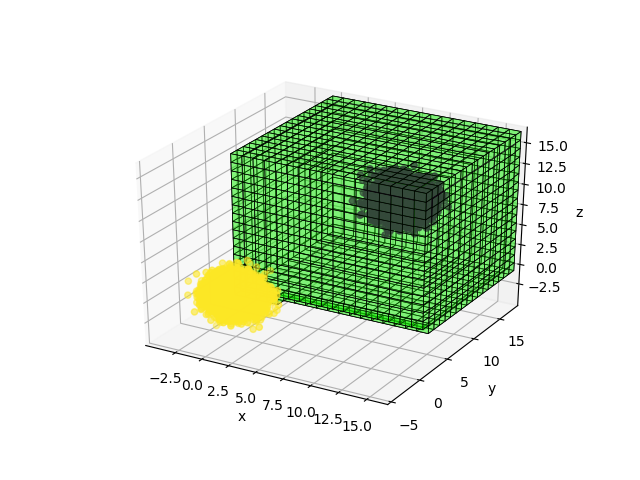

In [54]:
# Initialise model
model = MLPClassifier(activation="relu",hidden_layer_sizes=(50,50,50,10))

# Set up data
np.seed = 1

data1 = np.random.randn(7000, 3) + 10

data2 = np.random.randn(7000, 3) 

data = np.concatenate((data1,data2),axis=0)

# Generate predictions in terms of a formula
labels = []
for row in data1:
    labels.append(0)
    
for row in data2:
    labels.append(1)

# Fit model
model.fit(data, labels)

# Call the plotting function

plot_prediction_space_3d(data, labels, model, show_edges=True)

## Success!